In [22]:
from keras.applications.vgg16 import VGG16 as ModelTypeObj
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import sys
sys.path.append("../")
from IntegratedGradients import integrated_gradients

import matplotlib.pyplot as plt
import numpy as np

# VGG 16 model

Step 1. Download the model.

In [4]:
model = ModelTypeObj(weights="imagenet", include_top=True)

Step 2. Be sure to complie it and add an optimizer.

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy') 

Step 3. Wrap it with integrated gradients.

In [11]:
ig = integrated_gradients(model)

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


Step 4. Obtain a sample to explain.

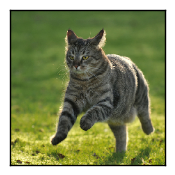

In [20]:
img = image.load_img("cat.jpg", target_size=(224, 224))
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [62]:
# preprocess image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# preprocess reference as well
ref = np.zeros((224, 224, 3))
ref = np.expand_dims(ref, axis=0)
ref = preprocess_input(ref)

Step 5. Predict for fun.

In [35]:
f = open('human_readable_labal.txt','r')
labels = eval(f.read())
f.close()

In [26]:
pred = model.predict(x)

In [37]:
predicted = np.argmax(pred)
print "Predicted label:", labels[predicted]

Predicted label: tiger cat


Step 6. Explain with respect to the true label.

In [63]:
exp = ig.explain(x[0], reference=ref[0], outc=predicted)

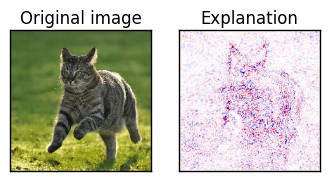

In [86]:
plt.figure(figsize=(4,2))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.xticks([], [])
plt.yticks([], [])
plt.title("Original image")

th = max(np.abs(np.min(exp)), np.abs(np.max(exp)))
plt.subplot(1, 2, 2)
plt.imshow(np.sum(exp, axis=2), cmap="seismic", vmin=-1*th, vmax=th)
plt.xticks([], [])
plt.yticks([], [])
plt.title("Explanation")
plt.show()

It seems that VGG16 made prediction based on the actual cat. 